In [31]:
from pathlib import Path
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
EXP_DIR = Path("logs-new/100_rank50_splitReplFirstHalf_720k_camSmooth_30ImgPerScene_noBkgdBugFix/cameras")

all_intrinsics = []
all_poses = []
for cameras_filename in list(EXP_DIR.iterdir()):
    cameras = torch.load(cameras_filename, map_location='cpu')
    all_intrinsics.append(cameras['intrinsics'])
    all_poses.append(cameras['extrinsics'])

all_intrinsics = torch.stack(all_intrinsics)
all_poses = torch.stack(all_poses)

Text(0.5, 1.0, '30-view (red = object; colormap = iteration number)')

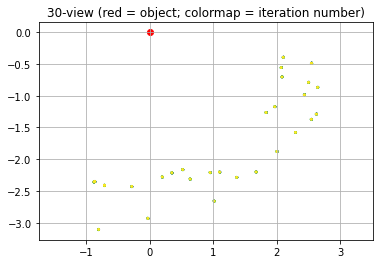

In [68]:
positions = all_poses[::3, :, :3, 3] # n_iters x n_cams x 3
iter_number = torch.arange(len(positions))[..., None].expand(positions[..., 0].shape) # n_iters x n_cams
positions_2d = positions[:, :, 0:3:2] # n_iters x n_cams x 2
positions_2d_flattened = positions_2d.reshape(-1, 2) # n_iters*n_cams x 2
plt.scatter(*positions_2d_flattened.T, c=iter_number.reshape(-1), s=2)
plt.scatter(0, 0, c='red')
plt.axis('equal')
plt.grid()
plt.title(f"{positions.shape[1]}-view (red = object; colormap = iteration number)")

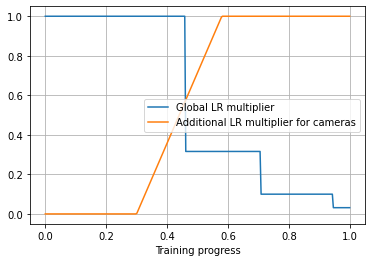

In [52]:
progress = torch.linspace(0, 1, 300)

y = torch.ones_like(progress)
LR_MULT = 0.316
y[progress > 330/720] *= LR_MULT
y[progress > 510/720] *= LR_MULT
y[progress > 680/720] *= LR_MULT
plt.plot(progress, y)

LEFT = 0.3
RIGHT = 0.58
y2 = ((progress - LEFT) / (RIGHT - LEFT)).clamp(0, 1)
plt.plot(progress, y2)
# plt.plot(progress, y*y2)

plt.legend(["Global LR multiplier", "Additional LR multiplier for cameras"])
plt.xlabel("Training progress")
plt.grid()